Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from math import sqrt
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp

df = pd.read_csv('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\music.csv')

In [2]:
pd.options.display.max_columns = None
df.head()

,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,location,longitude,loudness,mode,mode_confidence,release.id,release.name,similar,song.hotttnesss,song.id,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,California - LA,-63.933358,-11.197,0,0.636,300848,Fear Itself,ARV4KO21187FB38008,0.602120,SOMZWCG12A8C13C480,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,"Memphis, TN",-90.048920,-9.843,0,0.430,300822,Dimensions,ARSZWK21187B9B26D7,NaN,SOCIWDW12A8C13D406,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,Not available,-63.933358,-9.689,1,0.565,514953,Las Numero 1 De La Sonora Santanera,ARFSJUG11C8A421AAD,NaN,SOXVLOJ12AB0189215,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,"London, England",-63.933358,-9.013,1,0.749,287650,Friend Or Foe,AR4R0741187FB39AF2,NaN,SONHOTT12A8C13493C,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,Not available,-63.933358,-4.501,1,0.371,611336,Muertos Vivos,ARUA62A1187B99D9B0,0.604501,SOFSOCN12A8C143F5D,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


In [3]:
df = df.drop(['artist_mbtags'], axis=1)

In [4]:
# this will take care of all the int or float columns
df = df.fillna(df.mean()) 

# This takes care of the Nan in 'artist_mbtags'
df['similar'] = df['similar'].fillna(df['similar'].mode()[0])
df['terms'] = df['terms'].fillna(df['terms'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])



In [5]:
print (df.isna().sum())

artist.hotttnesss            0
artist.id                    0
artist.name                  0
artist_mbtags_count          0
bars_confidence              0
bars_start                   0
beats_confidence             0
beats_start                  0
duration                     0
end_of_fade_in               0
familiarity                  0
key                          0
key_confidence               0
latitude                     0
location                     0
longitude                    0
loudness                     0
mode                         0
mode_confidence              0
release.id                   0
release.name                 0
similar                      0
song.hotttnesss              0
song.id                      0
start_of_fade_out            0
tatums_confidence            0
tatums_start                 0
tempo                        0
terms                        0
terms_freq                   0
time_signature               0
time_signature_confidence    0
title   

In [6]:
df.describe()

,artist.hotttnesss,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,longitude,loudness,mode,mode_confidence,release.id,song.hotttnesss,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms_freq,time_signature,time_signature_confidence,year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,0.385552,0.524686,0.239595,1.065246,0.613963,0.428497,240.622038,0.756708,0.565456,5.366580,0.451458,37.157357,-63.933358,-10.483529,0.691000,0.477765,371024.058400,0.342761,229.883436,0.507875,0.299886,122.900913,2.248903e+02,3.564443,0.599785,934.704600
std,0.143647,0.884095,0.288259,1.723468,0.322441,0.806217,246.084090,1.858958,0.160129,9.671788,0.332143,9.541095,30.894250,5.399704,0.462104,0.191269,236777.828209,0.185818,112.024303,0.332357,0.510925,35.204746,2.239216e+04,1.266620,8.991567,996.650657
min,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,1.044440,0.000000,0.000000,0.000000,0.000000,-41.280540,-162.436500,-51.643000,0.000000,0.000000,0.000000,0.000000,-21.394000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.325266,0.000000,0.035000,0.441590,0.409750,0.194655,176.032200,0.000000,0.467626,2.000000,0.225000,37.157357,-73.948880,-13.160000,0.000000,0.360000,172858.000000,0.319566,168.855750,0.237000,0.110692,96.959500,9.476125e-01,3.000000,0.097750,0.000000
50%,0.380742,0.000000,0.120000,0.785460,0.686000,0.332585,223.059140,0.199000,0.563749,5.000000,0.469000,37.157357,-63.933358,-9.379500,1.000000,0.487000,333103.000000,0.342761,213.864500,0.500000,0.191520,120.156500,9.999728e-01,4.000000,0.551000,0.000000
75%,0.453858,1.000000,0.351000,1.224075,0.882000,0.500753,276.375060,0.421000,0.668020,8.000000,0.659000,37.157357,-63.933358,-6.530750,1.000000,0.606000,573532.500000,0.405116,266.274750,0.774250,0.294743,144.006750,1.000000e+00,4.000000,0.864000,2000.000000
max,1.082503,9.000000,8.855240,59.743540,1.000000,12.245830,22050.000000,43.119000,1.000000,904.802810,19.081000,69.651020,174.767140,0.566000,1.000000,1.000000,823599.000000,1.000000,1813.426000,9.227560,12.245830,262.828000,2.239217e+06,7.000000,898.891000,2010.000000


OUTCOME VARIABLE:
Song Hotness

CATEGORICAL PREDICTOR VARIABLES:
Location,
Year 

CONTINUOUS PREDICTOR VARIABLES:
Duration,
Tempo,
Loudness


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


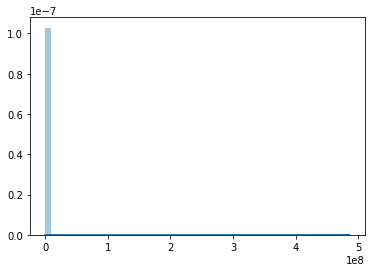

In [7]:
df['duration_2'] = df['duration'] * df['duration']
sns.distplot(df['duration_2'].values )

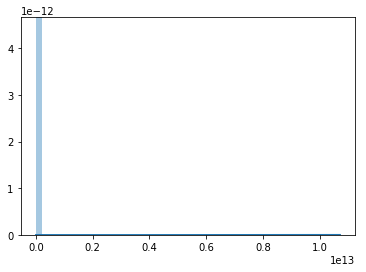

In [8]:
df['duration_3'] = df['duration'] * df['duration'] * df['duration']
sns.distplot(df['duration_3'].values )

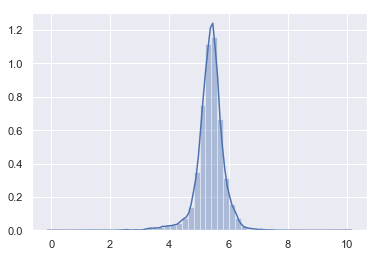

In [9]:
df['duration_log'] = np.log(df['duration'])
sns.set(color_codes=True)
sns.distplot(df['duration_log'].values )



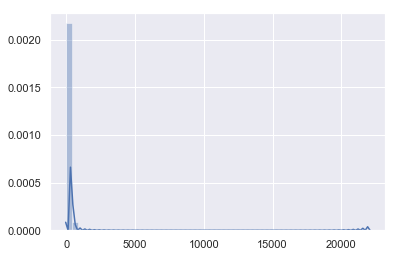

In [10]:
sns.distplot(df['duration'].values )

In [11]:
#features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

#print(pd.crosstab(features['Nordic'], df['cntry']))

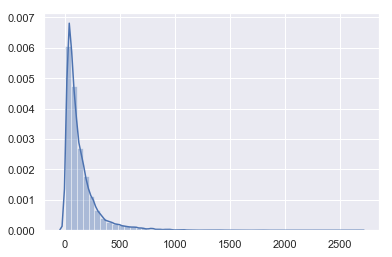

In [12]:
df['loudness_2'] = df['loudness'] * df['loudness']
sns.distplot(df['loudness_2'].values )

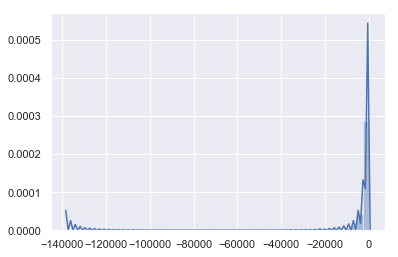

In [13]:
df['loudness_3'] = df['loudness'] * df['loudness'] * df['loudness']
sns.distplot(df['loudness_3'].values )

In [14]:
df['loudness_log'] = np.log(df['loudness'])
sns.set(color_codes=True)
#sns.distplot(df['loudness_log'].values )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


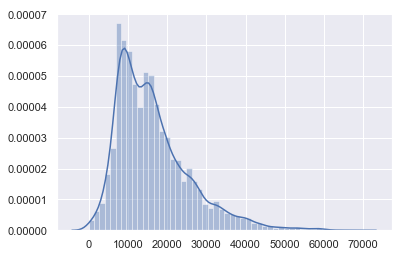

In [15]:
df['tempo_2'] = df['tempo'] * df['tempo']
sns.distplot(df['tempo_2'].values )

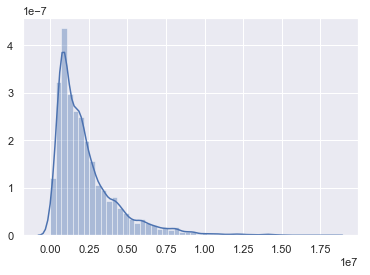

In [16]:
df['tempo_3'] = df['tempo'] * df['tempo'] * df['tempo']
sns.distplot(df['tempo_3'].values )

In [17]:
df['tempo_log'] = np.log(df['tempo'])
sns.set(color_codes=True)
#sns.distplot(df['tempo_log'].values )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [18]:
duration = df.groupby(['duration_2'])['song.hotttnesss'].mean()

In [19]:
duration.head()

duration_2
1.090855     0.342761
1.506265     0.342761
12.618125    0.342761
15.970254    0.342761
37.040370    0.342761
Name: song.hotttnesss, dtype: float64

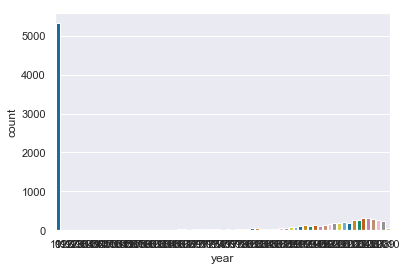

In [20]:
year = sns.countplot(df['year'],palette='colorblind')

In [21]:
df['year'].value_counts().head()


0       5320
2006     320
2005     304
2007     285
2004     270
Name: year, dtype: int64

In [22]:
features = pd.DataFrame()

#df['location'] = None



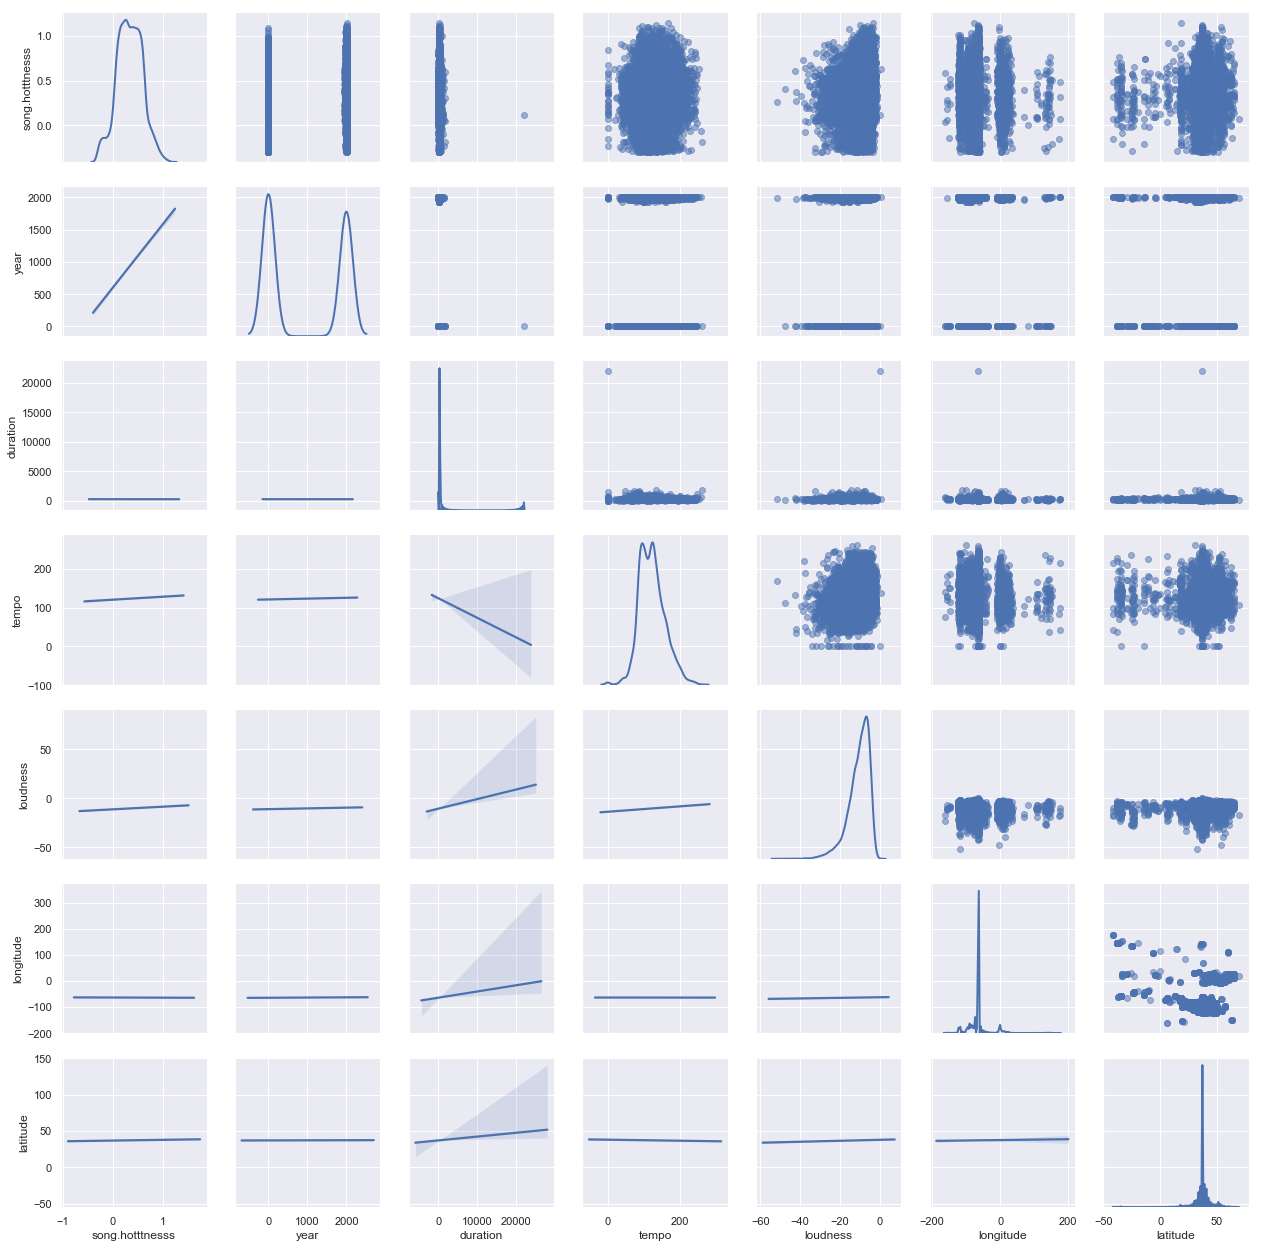

In [23]:
continuous = df[['song.hotttnesss', 'year','duration','tempo','loudness', 'longitude', 'latitude']]
jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=(continuous.shape)),columns=continuous.columns)
continuous = continuous.add(jitter)
random = sns.PairGrid(continuous, diag_sharey=False)
random.map_upper(plt.scatter, alpha=.5)
random.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
random.map_diag(sns.kdeplot, lw=2)
plt.show()

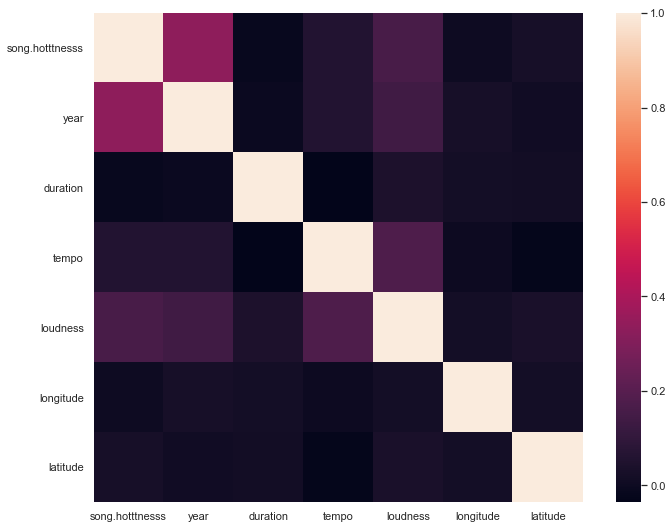

In [24]:
correlation = df[['song.hotttnesss', 'year','duration','tempo','loudness', 'longitude', 'latitude']]
correlation = correlation.corr()
f, ax = plt.subplots(figsize=(12, 9))
heatmap = sns.heatmap(correlation,square=True)